In [1]:
import sympy as sp
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
plt.rcParams.update({
    'text.latex.preamble': r'\usepackage{amsmath}',
    'text.usetex': True,
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica']
})

In [87]:
x = sp.symbols(r'x',real=True)
sig = sp.symbols(r'\sigma',real=True,positive=True)
a,c = sp.symbols(r'a c',real=True)

In [88]:
fx = sp.exp(-(x-a)**2/2/sig**2)
N  = 1/sp.sqrt(sp.integrate(fx**2,(x,-sp.oo,sp.oo)))
fx *= N
fx

exp(-(-a + x)**2/(2*\sigma**2))/(pi**(1/4)*sqrt(\sigma))

In [90]:
Txxc = sp.exp(-sp.Abs(x-c))
Txxc

exp(-Abs(c - x))

In [91]:
Txxc.subs(x,0).integrate((c,-sp.oo,sp.oo))

2

In [92]:
integrand = fx**2*Txxc
integrand

exp(-(-a + x)**2/\sigma**2)*exp(-Abs(c - x))/(sqrt(pi)*\sigma)

In [96]:
I = integrand.subs(a,0).integrate((x,-sp.oo,sp.oo)).simplify()#.integrate((c,-sp.oo,sp.oo))#.subs(sig1,1/10000).subs(sig2,1)
I_f = sp.lambdify((c,sig),I,'numpy')

In [97]:
I#.simplify().subs(c,0).evalf()

(-exp(2*c)*erf((\sigma**2 + 2*c)/(2*\sigma)) + exp(2*c) - erf((\sigma**2 - 2*c)/(2*\sigma)) + 1)*exp(\sigma**2/4 - c)/2

In [111]:
def I1(sigma):
    return quad(I_f,-100,100,args=(sigma,))

In [124]:
I1(2e-9)

(1.9999999949962834, 8.393679998527161e-09)

In [157]:
sigma = np.linspace(0.1,30,300)
temp  = np.array([I1(_)[0] for _ in sigma])

/var/folders/_b/29vq0z955j77svdys97cr5p40000gn/T/ipykernel_28826/584152733.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(I_f,-100,100,args=(sigma,))


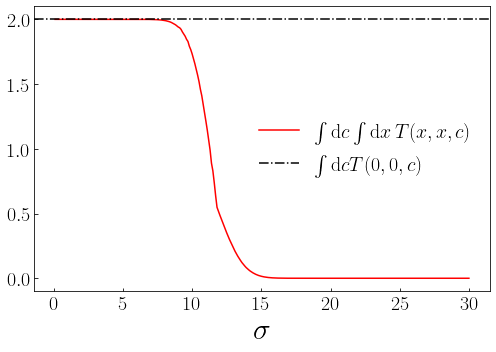

In [168]:
nrows,ncols = 1,1
fig,ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(7*ncols,5*nrows))

ax.plot(sigma,temp,'r-',label=r'$\int {\rm d}{c} \int {\rm d}{x} \, T(x,x,c)$')
ax.axhline(2,color='k',ls='-.',label=r'$\int {\rm d}{c} T(0,0,c)$')

ax.tick_params(axis='both',which='major',direction='in',labelsize=20)
ax.set_xlabel(r'$\sigma$',size=30)
ax.set_ylim(-0.1,2.1)
ax.legend(loc='center right',fontsize=20,frameon=False)

plt.tight_layout()
plt.show()
fig.savefig(r'prob1.pdf',bbox_inches='tight')

In [161]:
def f(x,sigma=1):
    return np.exp(-x**2/2/sigma**2)/(np.pi*sigma**2)**(1/4)

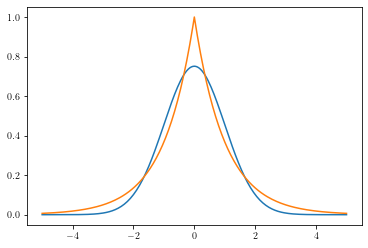

In [174]:
x = np.linspace(-5,5,201)
c = 0
plt.plot(x,f(x))
plt.plot(x,np.exp(-np.abs(x-c)))
plt.show()